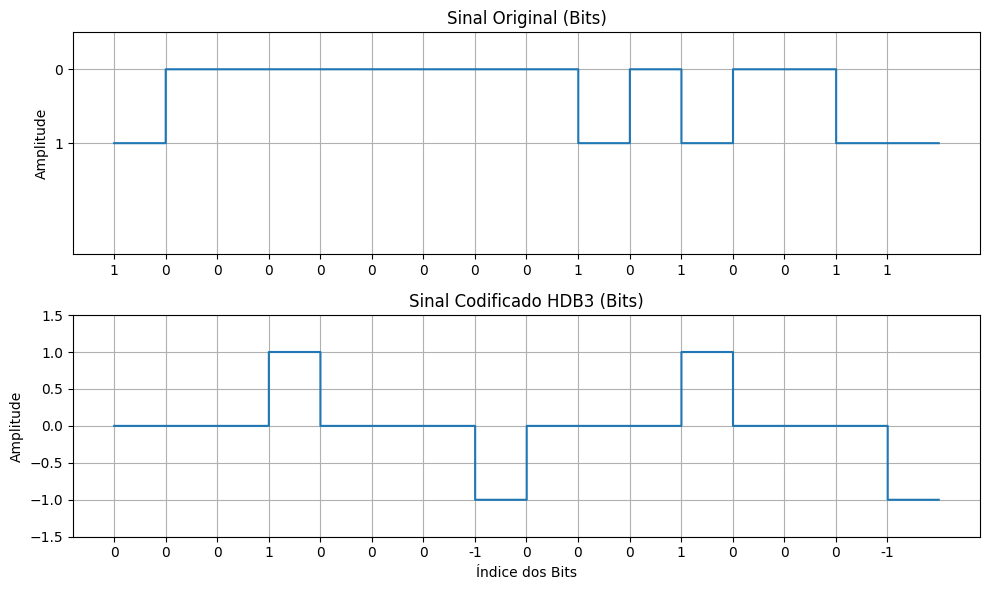

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Função para realizar a codificação HDB3
def hdb3_encoding(bits):
    encoded_signal = []
    last_polarity = -1  # Começa com polaridade negativa
    violation_polarity = 1
    zero_count = 0
    ones_count = 0

    for bit in bits:
        if bit == 1:
            # Alternância da polaridade para cada '1'
            encoded_signal.append(-last_polarity)
            last_polarity = -last_polarity
            zero_count = 0
            ones_count += 1
        else:
            zero_count += 1
            if zero_count == 4:
                # Se quatro zeros consecutivos forem encontrados, substituímos
                if ones_count % 2 == 0:
                    # Substituímos por 000V (violação de polaridade)
                    encoded_signal[-3:] = [0, 0, 0]  # Os três zeros anteriores
                    encoded_signal.append(violation_polarity)
                else:
                    # Substituímos por B00V (violação + bit de polaridade)
                    encoded_signal[-3:] = [-last_polarity, 0, 0]
                    encoded_signal.append(violation_polarity)
                last_polarity = violation_polarity
                violation_polarity = -violation_polarity
                zero_count = 0
                ones_count = 0
            else:
                encoded_signal.append(0)

    return np.array(encoded_signal)

# Função para expandir o sinal para visualização
def expand_signal(bits, samples_per_bit=100):
    expanded_signal = np.repeat(bits, samples_per_bit)
    return expanded_signal

# Função para plotar o sinal
def plot_signals(original_bits, encoded_signal):
    samples_per_bit = 100
    bit_time = np.arange(len(original_bits))  # Eixo x com o número dos bits

    # Expansão do sinal original e codificado
    original_signal_expanded = expand_signal(original_bits, samples_per_bit)
    encoded_signal_expanded = expand_signal(encoded_signal, samples_per_bit)

    # Ajuste do tempo com base na quantidade de bits
    time_original = np.linspace(0, len(original_bits), len(original_signal_expanded))
    time_encoded = np.linspace(0, len(encoded_signal), len(encoded_signal_expanded))

    # Plotando o sinal original
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_original, original_signal_expanded, drawstyle='steps-post')
    plt.xticks(bit_time, original_bits)
    plt.title('Sinal Original (Bits)')
    plt.ylabel('Amplitude')
    plt.ylim([-1.5, 1.5])
    plt.grid(True)

    # Plotando o sinal codificado HDB3
    plt.subplot(2, 1, 2)
    plt.plot(time_encoded, encoded_signal_expanded, drawstyle='steps-post')
    plt.xticks(bit_time, encoded_signal)
    plt.title('Sinal Codificado HDB3 (Bits)')
    plt.xlabel('Índice dos Bits')
    plt.ylabel('Amplitude')
    plt.ylim([-1.5, 1.5])
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Definindo os bits de entrada
original_bits = np.array(list("1000000001010011"))

# Codificando o sinal com HDB3
encoded_signal = hdb3_encoding(original_bits)

# Plotando os sinais
plot_signals(original_bits, encoded_signal)
